# POKEMONS

Этот набор данных для Pokemon-ов, который включает в себя:
- Name: Название каждого покемона
- Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам
- Type 2: некоторые покемоны имеют двойной тип

 базовую  статистику:
- Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон
- HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока
- Attack: базовый модификатор для обычных атак (например, Scratch, Punch)
- Defense: сопротивление базовому урону от обычных атак
- SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
- SP Def: сопротивление базового урона от специальных атак
- Speed: скорость атаки

так же для кажого покемона указано:

- поколение (generation)
- легендарность (legendary)

In [3]:
import numpy as np
import pandas as pd
import csv as cs
from sklearn import ensemble
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sbn
from sklearn.model_selection import cross_val_score, ShuffleSplit
%matplotlib inline

#### Загрузка данных

In [4]:
data = pd.read_csv('Pokemon_1.csv', sep = ',', engine = 'python')

In [5]:
type(data)

pandas.core.frame.DataFrame

Загрузили данные в таблицу data. Объект data имеет тип DataFrame – это основной тип данных в библиотеке pandas, предназначенный для представления табличных данных.

### Анализ данных

Узнаем размеры таблицы:

In [6]:
data.shape

(800, 12)

Наша таблица содержит 800 строк (объектов) и 12 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [7]:
cols = list(data.columns.values)
cols

['Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'Legendary']

Можно посмотреть на несколько первых и несколько последних строк этой таблицы, чтобы получить представление об имеющихся данных:

In [8]:
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
data.tail()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков: общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [10]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Посмотрим, как как признаки коррелируют между собой:

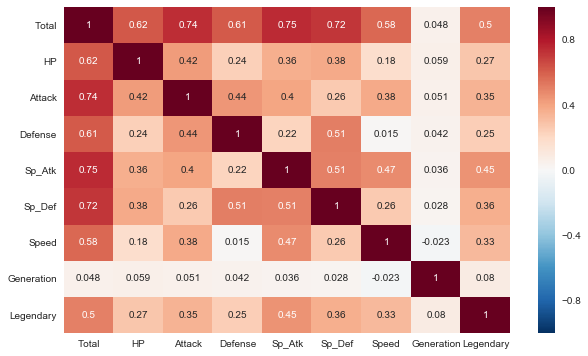

In [11]:
plt.figure(figsize=(10,6))
sbn.heatmap(data.corr(),annot=True) 
plt.show()

Коэффициент корреляции принимает значения от -1 до 1. Чем выше значение коэффициента корреляции, тем больше зависимость между величинами. Можно заметить, что признаки не сильно коррелируют между собой.

##### Зависимость атаки от колличества здоровья покемона:

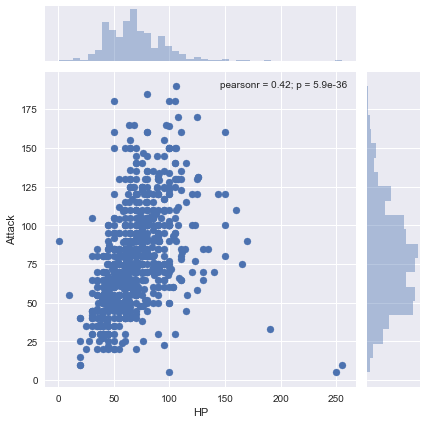

In [12]:
sbn.jointplot(x="HP", y="Attack", data=data);

##### Зависимость эффективности покемона от очереди его атаки:

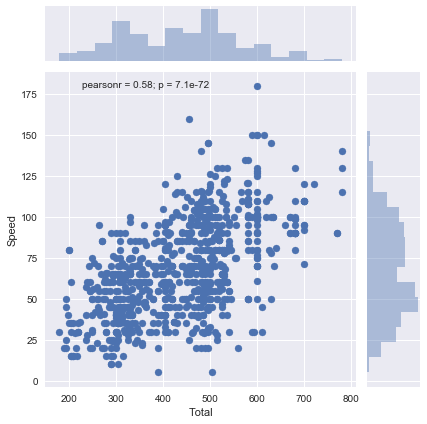

In [13]:
sbn.jointplot(x="Total", y="Speed", data=data);

##### Зависимость суммы всех статистических данных покемона от его уникальности:

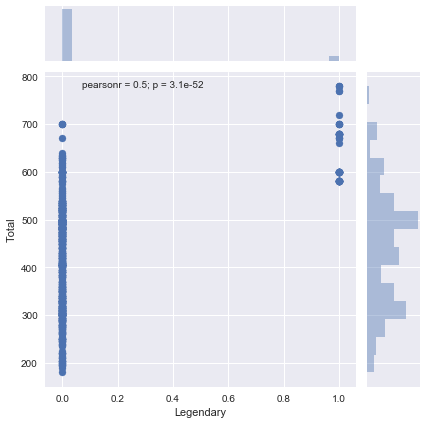

In [14]:
sbn.jointplot(x="Legendary", y="Total", data=data);

Посмотрим на количество покемонов по их типам:

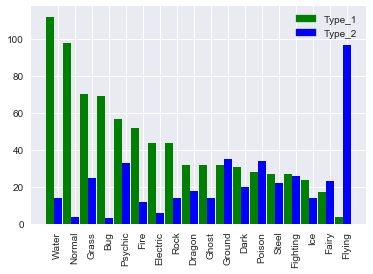

In [15]:
vals1 = [data['Type_1'].value_counts()[key] for key in data['Type_1'].value_counts().index]
vals2 = [data['Type_2'].value_counts()[key] for key in data['Type_1'].value_counts().index]
inds = np.arange(len(data['Type_1'].value_counts().index))
width = .45
handles = [ptc.Patch(color='g', label='Type_1'), ptc.Patch(color='b', label='Type_2')]
plt.bar(inds, vals1, width, color='g')
plt.bar(inds+width, vals2, width, color='b')
plt.gca().set_xticklabels(data['Type_1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
pass

Посмотрим на Total для легендарных покемонов по отдельным тапам:

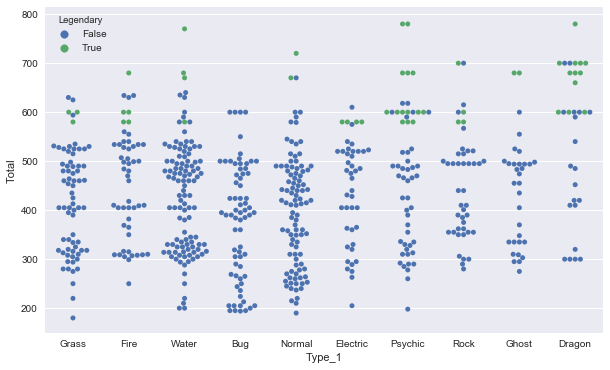

In [16]:
plt.figure(figsize=(10,6))
top_types=data['Type_1'].value_counts()[:10] 
df1=data[data['Type_1'].isin(top_types.index)]
sbn.swarmplot(x='Type_1',y='Total',data=df1, hue='Legendary')
plt.show()

### Перед нами будет стоять задача по определению легендарности покемона на основе его характиристик.
### Подготовка данных:
Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

In [17]:
data.count(axis=0)

Name          800
Type_1        800
Type_2        414
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64

Можно увидеть, что почти для половины покемонов не указан второй признак.

In [18]:
data[data.Type_2.isnull()].head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [19]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [20]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Type_2 является категориальным признаком,  есть два варианта, как поступить с незаполнеными значениями: заполнение пропущенных значений самым популярным в столбце или удалить этот столбец.

In [21]:
data['Type_2'].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type_2, dtype: object

Самый частый встречающийся Type_2 - это "Летающий", однако добавлять покемонам у которых нет второго типа такую способность будет неверным шагом, поэтому было решено удалить эту колонку для дальнейших вычислений.

In [22]:
data = data.drop('Type_2', axis=1)

#### А так же уберем имена покемонов и сумму всех статистических данных :

In [23]:
data = data.drop('Name', axis=1)
data = data.drop('Total', axis=1)

In [24]:
data.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Выделим категориальные и числовые признаки:

In [25]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


#### Небинарные признаки
К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак Type_2 принимает 18 различных значений:

In [26]:
#data_nonbinary = pd.get_dummies(data['Type_1'])
data_nonbinary = data['Type_1'].astype('category').cat.codes

Для удобства сразу заполним выделенный признаквыделенный признак - "Легендарность" покемона (вектор y) :

In [27]:
y = np.array([1 if it == True else 0 for it in data['Legendary']])

In [28]:
data = data.drop('Legendary', axis=1)

In [29]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']


### Нормализация количественных признаков
 
 Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [30]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [31]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [32]:
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


### Соединяем все в одну таблицу:

In [33]:
data = data_numerical
data['Type'] = data_nonbinary
print(data.shape)
print (data.columns)

(800, 8)
Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [34]:
data.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Type
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,9.467500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.580356
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,5.000000
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,10.000000
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,14.000000
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,17.000000


#### Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X),  выделенный признак (вектор y) был выделен выше: 

In [35]:
X = data
feature_names = X.columns

In [36]:
feature_names

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')

In [37]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 8)
(800,)


Теперь у нас 8 входных признаков.

### Обучающая и тестовая выборки

Cтроить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой.
В рассматриваемой задаче мы сами разобьем имеющиеся у нас данные на обучающую и тестовую выборки.
Разбиение на тестовую и обучающую выборку должно быть случайным. 

Мы воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70:30

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


In [39]:
 tt_errors = pd.DataFrame(columns=['model', 'train_errors', 'test_errors']) 

### KNN  – метод ближайших соседей

Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Количество соседей kk соответствует параметру n_neighbors.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

После обучения модели мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.

In [41]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0660714285714
Error test: 0.0916666666667


#### Подбор параметров

Наименьшее значение ошибки 0.0500 при n=1


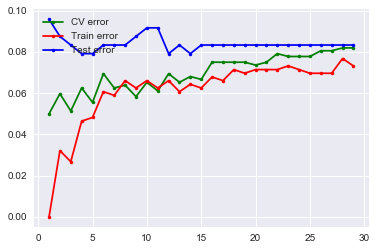

In [42]:
neighbors = range(1, 30)
err_train = []
err_test = []
cv_errors = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_n = neighbors[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при n={1}'.format(min(mean_sq_er), best_n))
plt.plot(neighbors, mean_sq_er, '.-g', label='CV error')
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

Запустим knn с n_neighbors = 1:

In [43]:
knn = KNeighborsClassifier(n_neighbors = best_n).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['knn',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0
Error test: 0.0958333333333


Получили ошибку 0.09%

### SVM – машина опорных векторов

Метод опорных векторов (SVM – Support vector machines) использует гиперплоскость, чтобы классифицировать данные по 2 классам. Производительность модели зависит от используемых параметров в функции. Kernel (ядро) отвечается за гиперплоскость и может принимать значения “linear” (для линейной), “rbf”, ”poly” (для нелинейной) и другие. 

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0303571428571
Error test: 0.0791666666667


На тестовой выборке получили ошибку в 0.07%. С помощью подбора параметров попробуем ее еще уменьшить. 

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation).

#### Радиальное ядро
В начале попробуем найти лучшие значения параметров для радиального ядра.

In [45]:
from sklearn.grid_search import GridSearchCV
C_array =  np.arange(0.1, 3, 0.1)
 
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array }, cv=10)
grid.fit(X_train, y_train)

print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CV error    =  0.048214285714285765
best C      =  1.8


Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [46]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['scm: rbf',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0178571428571
Error test: 0.0791666666667


Ошибка на тестовой выборке равна 0.079

#### Линейное ядро

In [47]:
from sklearn.grid_search import GridSearchCV
C_array =  np.arange(0.1, 3, 0.1)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array}, cv=10)
grid.fit(X_train, y_train)

print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.044642857142857095
best C      =  0.1


Получили ошибку перекрестного контроля в 0.044%.
Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [48]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['svm: linear',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0446428571429
Error test: 0.075


#### Полиномиальное ядро

In [49]:
from sklearn.grid_search import GridSearchCV
C_array =  np.arange(0.1, 3, 0.1)

svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array}, cv=10)
grid.fit(X_train, y_train)

print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.051785714285714324
best C      =  0.1


Получили ошибку перекрестного контроля в 0.051%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [50]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['svm: poly',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0125
Error test: 0.05


Ошибка на тестовой выборке составила 0.05%.

#### Сигмоидальное ядро

In [51]:
from sklearn.grid_search import GridSearchCV
C_array =  np.arange(0.1, 3, 0.1)

svc = SVC(kernel='sigmoid')
grid = GridSearchCV(svc, param_grid={'C': C_array}, cv=10)
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.08392857142857146
best C      =  0.1


In [52]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['svm: sigmoid',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.110714285714
Error test: 0.1125


Построим графики зависимости ошибки на тренировочкой и обучающей выборке от параметра С для кажого из ядер:

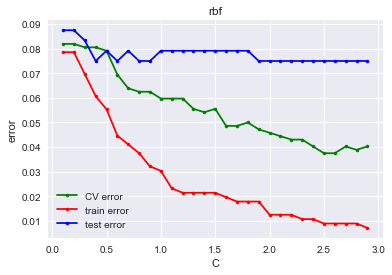

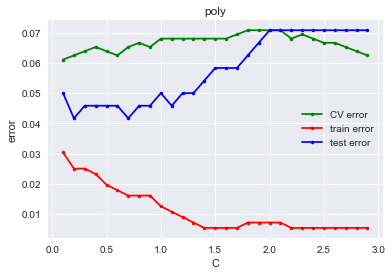

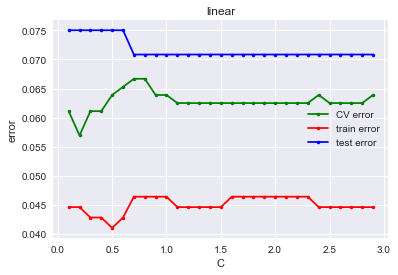

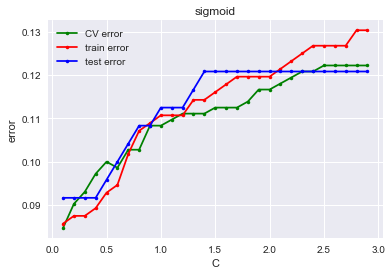

In [53]:
train_error = [[],[],[],[]]
test_error = [[],[],[],[]] 
cv_error = [[],[],[],[]]
mean_sq_er = [[],[],[],[]]

C = np.arange(0.1, 3, 0.1)
kernel = ['rbf', 'poly', 'linear', 'sigmoid']
for c in C:
    for s in kernel:
        svc_model = SVC(kernel = s, C = c)
        svc_model.fit(X_train, y_train)
        err_train = np.mean(y_train != svc_model.predict(X_train))
        err_test = np.mean(y_test != svc_model.predict(X_test))
        train_error[kernel.index(s)].append(err_train)
        test_error[kernel.index(s)].append(err_test)        
        cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        scores = cross_val_score(svc_model, X, y, cv=cv, scoring='accuracy')
        #cv_error[kernel.index(s)].append(scores)
        cv_error[kernel.index(s)].append(np.mean(scores))
        mean_sq_er[kernel.index(s)] = [1-x for x in cv_error[kernel.index(s)]]

            
for i in range(len(mean_sq_er)):
    plt.plot(C, mean_sq_er[i],'.-g', label='CV error')
    plt.plot(C, train_error[i],'.-r', label = 'train error')
    plt.plot(C, test_error[i],'.-b', label = 'test error')
    plt.legend()
    plt.title(kernel[i])
    plt.xlabel('C')
    plt.ylabel('error')
    plt.show()

Лучшие показатели вышли у линейного ядра, для полиноминального ядра получилось переобучение.

### Logistic Regression

Это статистическая модель, используемая для предсказания вероятности возникновения некоторого события путём подгонки данных к логистической кривой.

In [54]:
from sklearn import linear_model
lg = linear_model.LogisticRegression()
lg.fit(X_train, y_train)
err_train = 1 - lg.score(X_train, y_train)
err_test = 1 - lg.score(X_test, y_test)

tt_errors.loc[len(tt_errors)] = ['log reg',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0428571428571
Error test: 0.075


Наименьшее значение ошибки 0.0556 при C=6


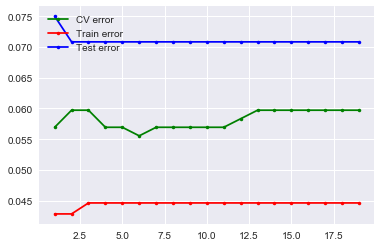

In [55]:
Cs = range(1,20, 1)
err_train = []
err_test = []
mean_sq_er = []
cv_errors = []

for C in Cs:
    model = linear_model.LogisticRegression(C=C)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_n = Cs[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при C={1}'.format(min(mean_sq_er), best_n))
plt.plot(Cs, mean_sq_er, '.-g', label='CV error')
plt.plot(Cs, err_train, '.-r', label = 'Train error')
plt.plot(Cs, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

### Linear Discriminant Analysis

Линейный дискриминантный анализ (LDА) применяется для нахождения линейных комбинаций признаков, наилучшим образом разделяющих два или более класса объектов. Полученная комбинация может быть использована в качестве линейного классификатора или для сокращения размерности пространства признаков перед последующей классификацией.

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_train_predict = lda.predict(X_train)
y_test_predict = lda.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

tt_errors.loc[len(tt_errors)] = ['lda',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0571428571429
Error test: 0.0625


### Quadratic Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
reg_param_array = np.arange(0, 1, 0.1)
qda = QuadraticDiscriminantAnalysis()
grid = GridSearchCV(qda, param_grid = {'reg_param': reg_param_array})
grid.fit(X_train, y_train)

best_qda_err = 1 - grid.best_score_
best_reg = grid.best_estimator_.reg_param
print (best_qda_err, best_reg)

0.050000000000000044 0.6


In [58]:
qda = QuadraticDiscriminantAnalysis(reg_param=best_reg).fit(X_train, y_train)
y_train_predict = qda.predict(X_train)
y_test_predict = qda.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
tt_errors.loc[len(tt_errors)] = ['qda',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0464285714286
Error test: 0.075


### Naive Bayes

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы очень часто работаеют не хуже, а то и лучше более сложных алгоритмов.

Достоинством наивного байесовского классификатора является малое количество данных для обучения, необходимых для оценки параметров, требуемых для классификации.
Наивный Байесовский классификатор один из самых простых из алгоритмов классификации. 

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [60]:
err_train = 1 - gnb.score(X_train, y_train)
err_test = 1 - gnb.score(X_test, y_test) 

tt_errors.loc[len(tt_errors)] = ['naive bayes',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0607142857143
Error test: 0.0916666666667


## Random Forest

Наименьшее значение ошибки 0.0528 при n=9


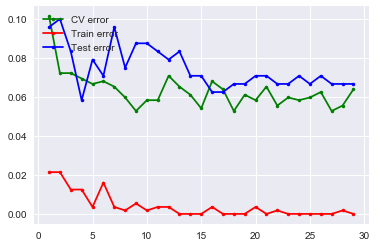

In [61]:
estimators = range(1, 30)
err_train = []
err_test = []
cv_errors = []

for k in estimators:

    model = ensemble.RandomForestClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_e = neighbors[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при n={1}'.format(min(mean_sq_er), best_e))
plt.plot(neighbors, mean_sq_er, '.-g', label='CV error')
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

In [62]:
rf = ensemble.RandomForestClassifier(n_estimators = best_n)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

tt_errors.loc[len(tt_errors)] = ['Random Forest',err_train, err_test]

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.0178571428571
Error test: 0.0666666666667


### Значимость признаков:

In [63]:
np.sum(rf.feature_importances_)

1.0

In [64]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
d = len(importances)

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Speed' (0.213493)
 2. feature 'Sp_Atk' (0.206734)
 3. feature 'Sp_Def' (0.141888)
 4. feature '   HP' (0.140770)
 5. feature 'Attack' (0.137377)
 6. feature 'Defense' (0.100207)
 7. feature ' Type' (0.042396)
 8. feature 'Generation' (0.017135)


(-1, 8)

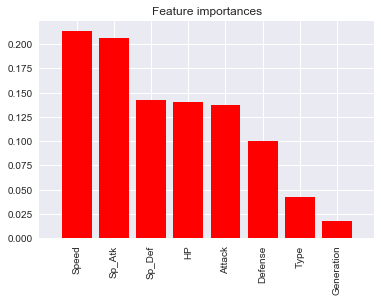

In [65]:
d_first = d
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [66]:
tt_errors

,model,train_errors,test_errors
0,knn,0.000000,0.095833
1,scm: rbf,0.017857,0.079167
2,svm: linear,0.044643,0.075000
3,svm: poly,0.012500,0.050000
4,svm: sigmoid,0.110714,0.112500
5,log reg,0.042857,0.075000
6,lda,0.057143,0.062500
7,qda,0.046429,0.075000
8,naive bayes,0.060714,0.091667
9,Random Forest,0.017857,0.066667


###### Большинство использованных методов показали значение ошибки классификации менее 11 %, значит, что мы с высокой точностью сможем вычислить является покемон легендарным или нет. Наилуший результат показала машина опорных векторов с полиноминальным ядром.

### Extreme Random Trees

In [91]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0666666666667


Наименьшее значение ошибки 0.0486 при n=20


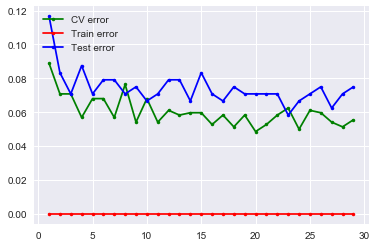

In [92]:
estimators = range(1, 30)
err_train = []
err_test = []
cv_errors = []

for k in estimators:

    model = ensemble.ExtraTreesClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_e = neighbors[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при n={1}'.format(min(mean_sq_er), best_e))
plt.plot(neighbors, mean_sq_er, '.-g', label='CV error')
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

### AdaBoost

In [93]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.0708333333333


Наименьшее значение ошибки 0.0569 при n=7


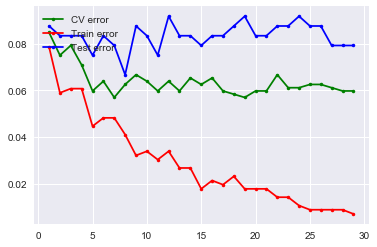

In [94]:
estimators = range(1, 30)
err_train = []
err_test = []
cv_errors = []

for k in estimators:

    model = ensemble.AdaBoostClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_e = neighbors[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при n={1}'.format(min(mean_sq_er), best_e))
plt.plot(neighbors, mean_sq_er, '.-g', label='CV error')
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()

### Gradient Boosted Trees

На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [95]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.0791666666667


Наименьшее значение ошибки 0.0667 при n=17


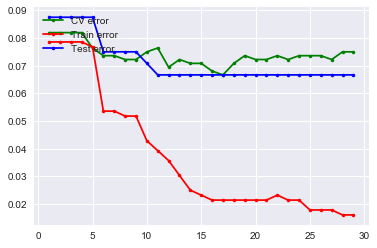

In [96]:
estimators = range(1, 30)
err_train = []
err_test = []
cv_errors = []

for k in estimators:

    model = ensemble.GradientBoostingClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(scores.mean())

mean_sq_er = [1-x for x in cv_errors]
best_e = neighbors[mean_sq_er.index(min(mean_sq_er))]


print('Наименьшее значение ошибки {0:.4f} при n={1}'.format(min(mean_sq_er), best_e))
plt.plot(neighbors, mean_sq_er, '.-g', label='CV error')
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.show()